## Investigate MERIT zonal stats
We want to divide the landscape into a few main topographic elements. 
Here we look at elevation mean and standard deviation to see if there are any obvious breakpoints.

In [1]:
import geopandas as gpd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = Path('/Users/wmk934/data/perceptual_models/data/zonal_stats/')
file_name = 'merit_hydro_basins_elev_mean_max_min_std.shp'
shp = gpd.read_file(file_path/file_name)

In [3]:
# Create the heatmap
vec_mean = shp['mean'][~np.isnan(shp['mean'])]
vec_stdv = shp['std'][~np.isnan(shp['std'])]
H, xedges, yedges = np.histogram2d(vec_mean,vec_stdv, bins=(np.arange(-100,4000,100), np.arange(0,1300,25)))
# Histogram does not follow Cartesian convention (see Notes), therefore transpose H for visualization purposes.
H = H.T
X, Y = np.meshgrid(xedges, yedges)

/var/folders/w4/hh0hkdr92cg8llf8s0l5rzj80000gq/T/ipykernel_98608/3598987046.py:8: RuntimeWarning: divide by zero encountered in log
  pcm = axs[2].pcolormesh(X, Y, np.log(H))


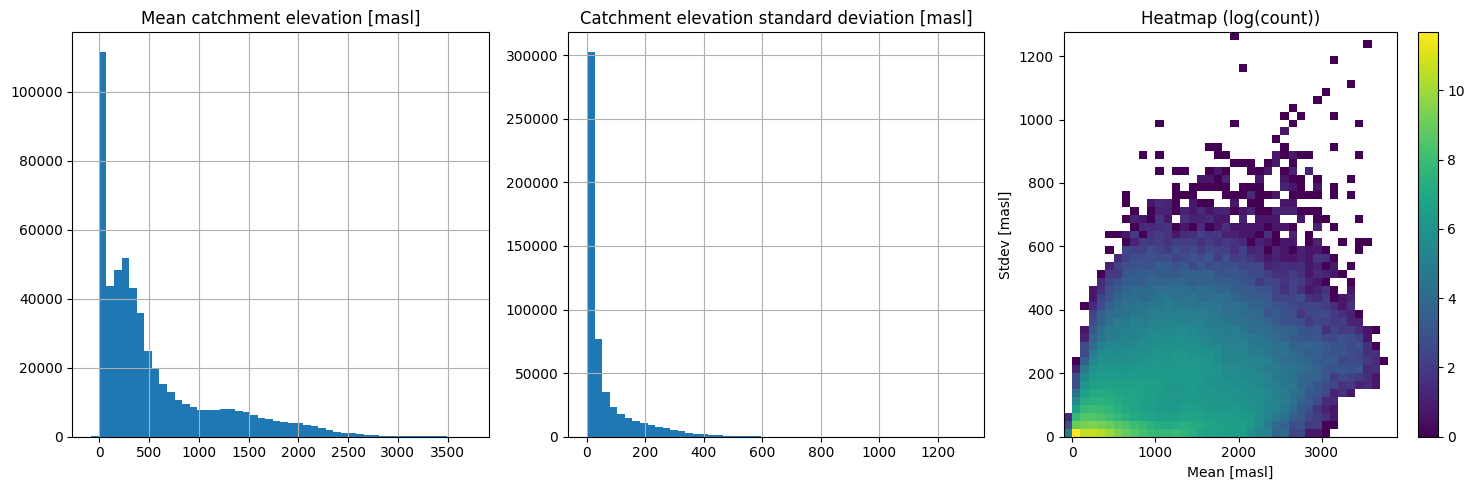

In [4]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

shp['mean'].hist(ax=axs[0], bins=50)
axs[0].set_title('Mean catchment elevation [masl]')
shp['std'].hist(ax=axs[1], bins=50)
axs[1].set_title('Catchment elevation standard deviation [masl]')

pcm = axs[2].pcolormesh(X, Y, np.log(H))
fig.colorbar(pcm,ax=axs[2])
axs[2].set_xlabel('Mean [masl]')
axs[2].set_ylabel('Stdev [masl]')
axs[2].set_title('Heatmap (log(count))')

plt.tight_layout()

In [5]:
mask_mountain = (shp['mean'] >  550) & (shp['std'] >  100)
mask_plateau  = (shp['mean'] >  550) & (shp['std'] <= 100)
mask_hill     = (shp['mean'] <= 550) & (shp['std'] >   25)
mask_plain    = (shp['mean'] <= 550) & (shp['std'] <=  25)

shp['topo_cat'] = 0
shp.loc[mask_mountain, 'topo_cat'] = 1
shp.loc[mask_plateau, 'topo_cat'] = 2
shp.loc[mask_hill, 'topo_cat'] = 3
shp.loc[mask_plain, 'topo_cat'] = 4

shp_new = shp[['topo_cat','geometry']].copy()

In [6]:
shp_regions = shp_new.dissolve(by='topo_cat')

<Axes: >

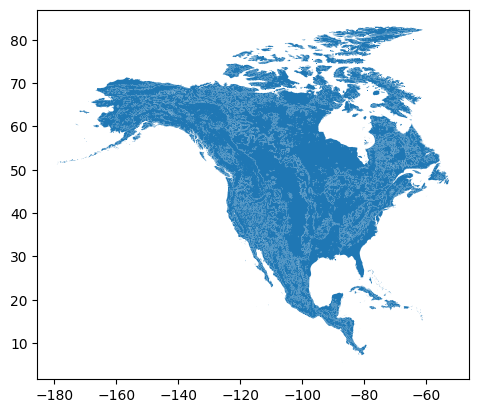

In [7]:
shp_regions.plot()

In [ ]:
file_path = Path('/Users/wmk934/data/perceptual_models/data/shapefiles')
file_name = 'topographic_regions.shp'
file_path.mkdir(parents=True, exist_ok=True)
shp_regions.to_file(file_path/file_name)

In [ ]:
# geopackage
file_path = Path('/Users/wmk934/data/perceptual_models/data/shapefiles')
file_name = 'topographic_regions.gpkg'
file_path.mkdir(parents=True, exist_ok=True)
shp_regions.to_file(file_path/file_name, driver='GPKG')